<h1 style="color:#FF851B;"><center><b style="font-size:180%;"><u>FEATURE ENGINEERING FROM SCRATCH</u></b></center></h1>

<p style="font-size:160%;">Throughout this notebook, you will become good at spotting, understanding, and imputing 
<b style="color:blue;">ALL FEATURE ENGINEERING STEPS</b>. We demonstrate various imputation techniques on a real-world task using Python. Properly handling missing data, outiers, categorical data, transformation, and feature selection has an improving effect on inferences and predictions. This is not to be ignored.</p>

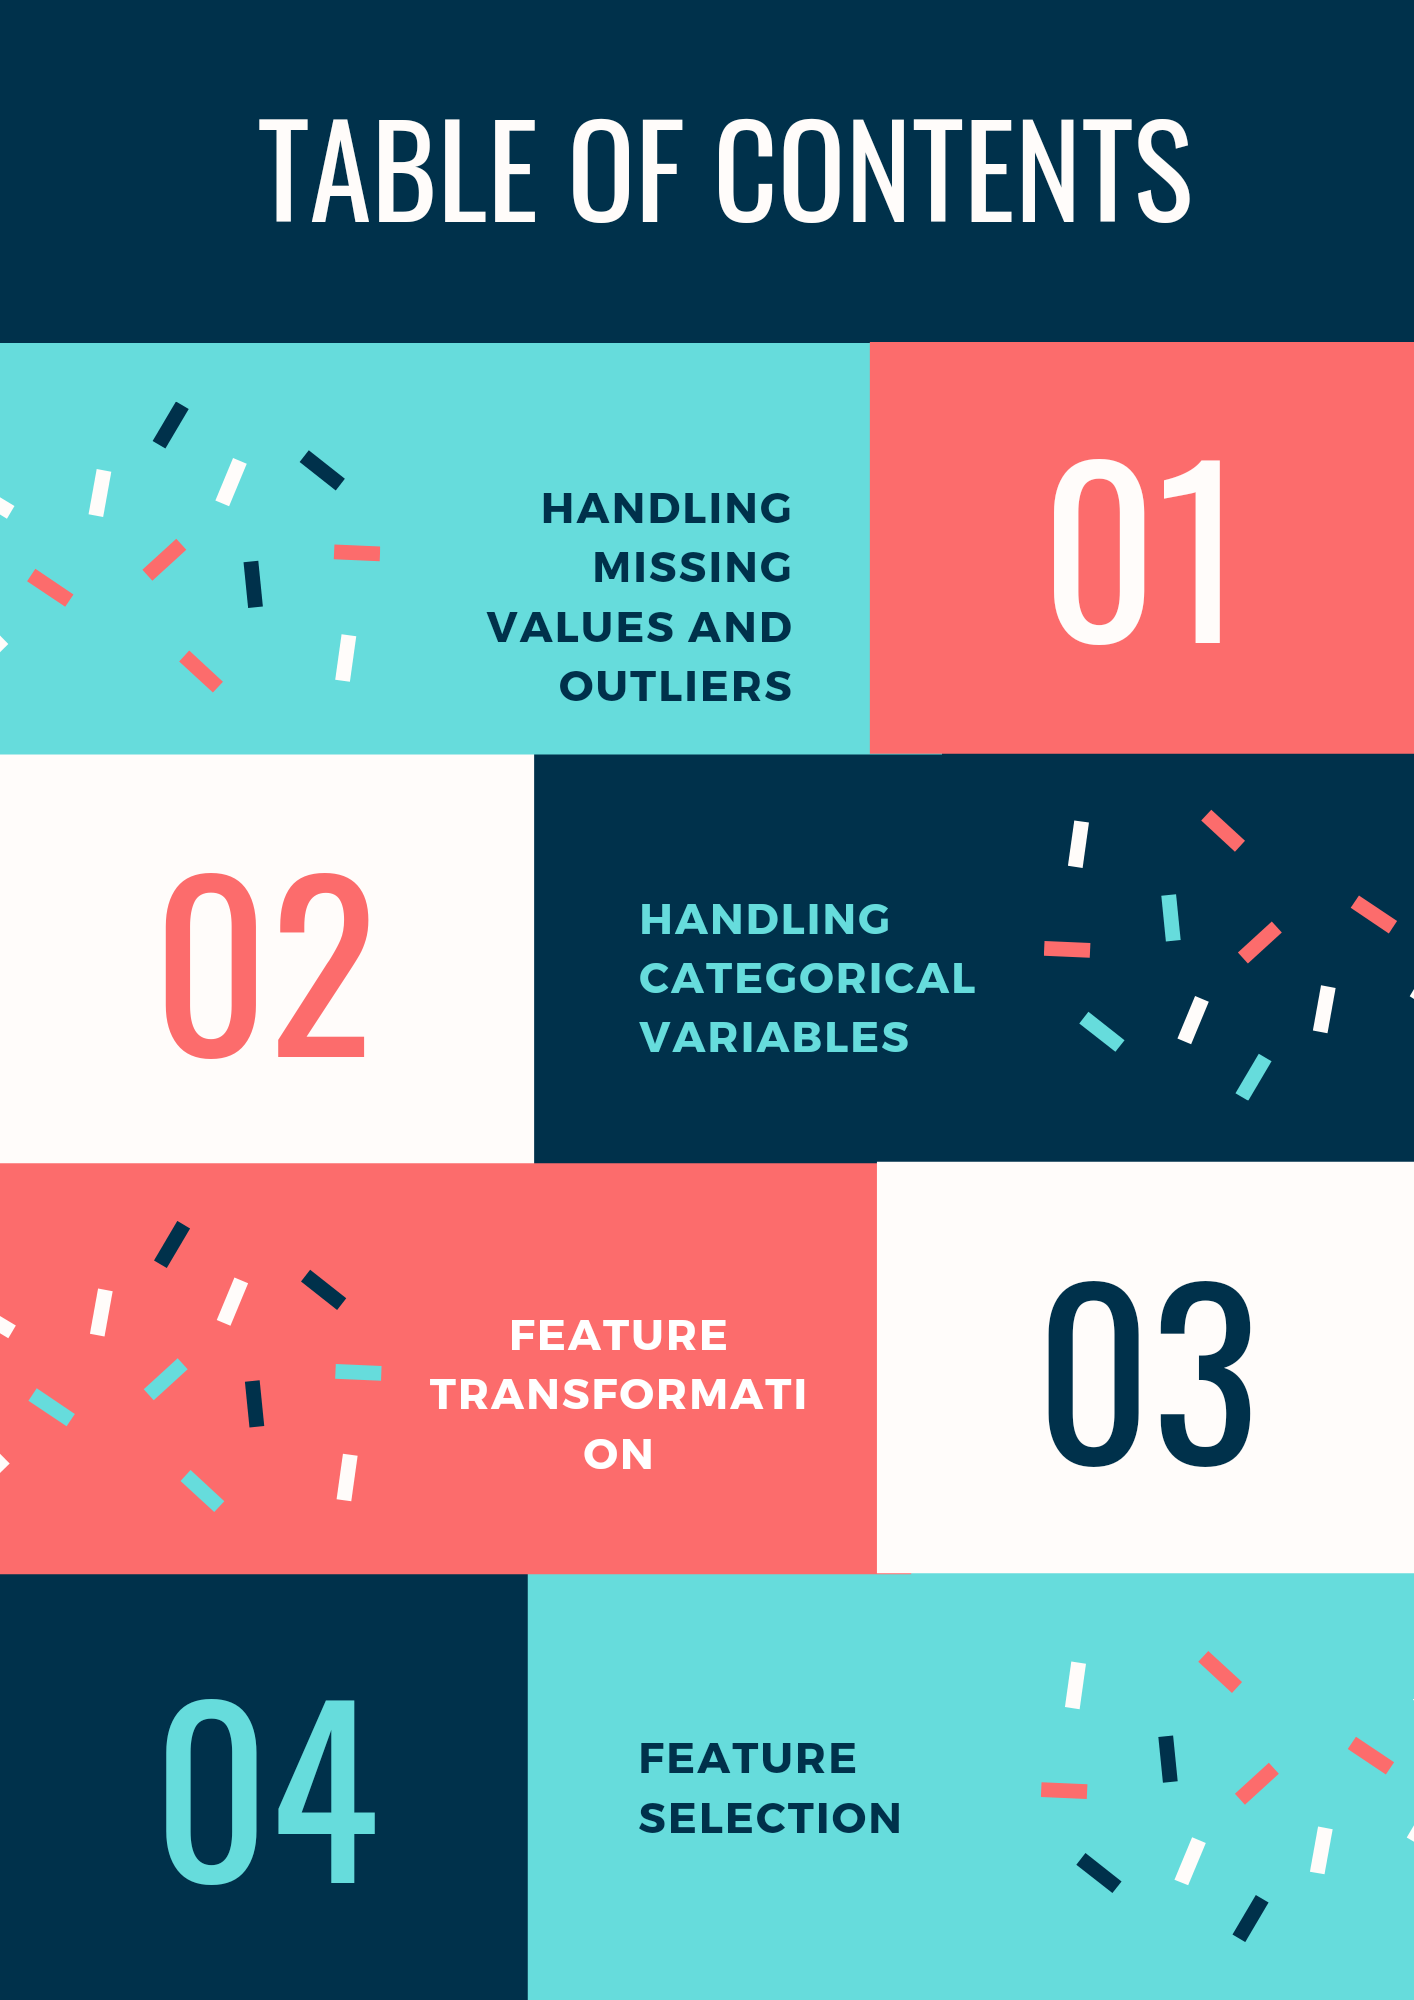

----

<h1 style="color:navy;"><center><b style="font-size:160%;"><u>HANDLING MISSING VALUES</u></b></center></h1>

<p style="font-size:200%;">There are 3 major types of missing values to be concerned about.</p>

<ul>
  <li style="font-size:150%;">Missing Completely at Random</li>
  <li style="font-size:150%;">Missing at Random</li>
  <li style="font-size:150%;">Missing Not at Random</li>
</ul>

<p style="font-size:180%;"><b>MISSING COMPLETELY AT RANDOM</b></p>

<ul>
  <li style="font-size:130%;">MCAR occurs when the probability of missing values in a variable is the same for all samples.</li>
  <li style="font-size:130%;">For example, when a survey is conducted, and values were just randomly missed when being entered in the computer or a respondent chose not to respond to a question.</li>
</ul>






<p style="font-size:180%;"><b>MISSING AT RANDOM</b></p>

<ul>
  <li style="font-size:130%;">The probability of missing values, at random, in a variable depends only on the available information in other predictors.</li>
  <li style="font-size:130%;">For example, when men and women respond to the question “have you ever taken parental leave?”, men would tend to ignore the question at a different rate compared to women.</li>
  <li style="font-size:130%;">MARs are handled by using the information in the other predictors to build a model and impute a value for the missing entry.</li>
</ul>

<p style="font-size:180%;"><b>MISSING NOT AT RANDOM</b></p>

<ul>
  <li style="font-size:130%;">TThe probability of missing values, not at random, depends on information that has not been recorded, and this information also predicts the missing values.</li>
  <li style="font-size:130%;">For example, in a survey, cheaters are less likely to respond when asked if they have ever cheated.</li>
  <li style="font-size:130%;">MNARs are almost impossible to handle.</li>
  <li style="font-size:130%;">Luckily there shouldn’t be any effect of MNAR on inferences made by a model trained on such data.</li>  
</ul>

<p style="font-size:180%;"><b>TECHNIQUES TO HANDLE MISSING VALUES</b></p>

<ul>
  <li style="font-size:130%;">Mean/Median/Mode</li>
  <li style="font-size:130%;">Random Sample Imputation</li>
  <li style="font-size:130%;">Capturing NaN with new feature</li>
  <li style="font-size:130%;">End of Distribution imputation</li>
  <li style="font-size:130%;">Arbitrary imputation</li>
  <li style="font-size:130%;">Frequent categories imputation</li>  
</ul>

<h1 style="font-size:180%;"><u style="color:black;"><b>IMPLEMENTATION OF MISSING VALUES USING PYTHON</b></u></h1>

In [114]:
import pandas as pd
import numpy as np

In [115]:
df = pd.read_csv('../input/titanic/train.csv')

### CHECK FOR MISSING VALUES:

In [116]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----

## 1. Mean/Median Imputation

<p style="font-size:150%;"><b>When to use mean/median imputation?</b></p>

<ul>
  <li style="font-size:130%;">Data is missing completely at random.</li>
  <li style="font-size:130%;"> No more than 5% of the variable contains missing data.</li>
</ul>

<p style="font-size:150%;"><b>Assumptions</b></p>

<ul>
  <li style="font-size:130%;">Data is missing completely at random (MCAR)</li>
  <li style="font-size:130%;">The missing observations, most likely look like the majority of the observations in the variable (aka, the mean/median)</li>
  <li style="font-size:130%;">If data is missing completely at random, then it is fair to assume that the missing values are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent/average observation.</li>
</ul>

In [117]:
#select only columns which have missing values:
df=pd.read_csv('../input/titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [118]:
## Lets get the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [119]:
# small function to impute the missing values with median of the col:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [120]:
#calculate the median of the Age feature:
median=df.Age.median()

#call the function:
impute_nan(df,'Age',median)

In [121]:
#check whether the dataframe is updated or not:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


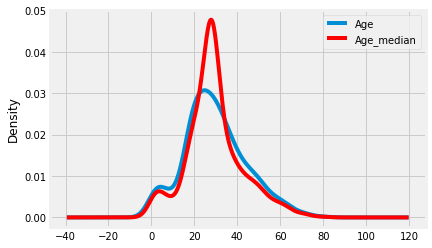

In [122]:
#VIZUALIZATION OF THE CHANGE:
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<p style="font-size:150%;"><b>ADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Easy to implement.</li>
  <li style="font-size:130%;">Fast way of obtaining complete datasets.</li>
  <li style="font-size:130%;">Can be integrated into production (during model deployment)..</li>
</ul>

<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Distortion of the original variable distribution.</li>
  <li style="font-size:130%;">Distortion of the original variance.</li>
</ul>

----

## 2. Random Sample Imputation

<ul>
  <li style="font-size:130%;">Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values</li>
</ul>


<p style="font-size:150%;"><b>Assumptions</b></p>
<ul>
  <li style="font-size:130%;">It assumes that the data are missing completely at random(MCAR)</li>
</ul>

In [123]:
import pandas as pd
df=pd.read_csv('../input/titanic/train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [124]:
#Function to impute misisng values using RANDOM SAMPLE IMPUTATION:

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    
    

In [125]:
#median calculation:
median=df.Age.median()

#Call the function:

impute_nan(df, "Age", median)

In [126]:
#check for the updation:

df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


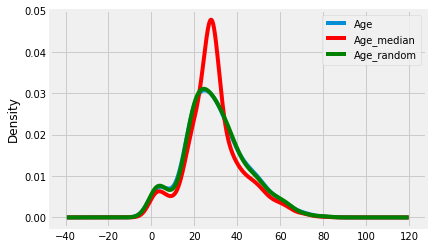

In [127]:
#Visualization:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<p style="font-size:150%;"><b>ADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Easy to implement.</li>
  <li style="font-size:130%;">There is less distortion in variance.</li>
</ul>

<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">In every situation randomness wont work.</li>
</ul>

-----

## 3. Capturing NaN with New Feature

<ul>
  <li style="font-size:130%;">This technique suits well, when the data is not missing at random (MNAR). We will be capturing Nan values and further it will be replaced with our new features which we will compute on desired column or values.</li>
</ul>

In [128]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/titanic/train.csv', usecols=['Age','Fare','Survived'])

In [129]:
df['Age_NaN'] = np.where(df['Age'].isnull(), 1, 0)
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


<ul>
  <li style="font-size:130%;">Here simply we are creating new column named as “Age_NAN” where we are taking the null values of the column Age and replacing it with 1 if the value is NaN and with 0 if it’s not Nan value. The where () function is a very handy function using which you can use the functionality of where clause from SQL.</li>
</ul>

<p style="font-size:150%;"><b>ADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Easy to implement.</li>
  <li style="font-size:130%;">Able to capture the importance of missing values</li>
</ul>

<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Creates additional features causing Curse of Dimensionality (CoD). This might happen in the case where you have huge amount of data. This means that this technique will work perfectly where you have sparse data.</li>
</ul>

-------------

## 4. End Of Distribution

<ul>
  <li style="font-size:130%;">This method is a bit tricky as it’s not that straightforward as it sounds. Talking about the basic definition then in this technique we will take values which are far away from the distribution aka end of the distribution.Lets this see using visualization.</li>
</ul>

In [130]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/titanic/train.csv', usecols=['Age','Fare','Survived'])

<AxesSubplot:>

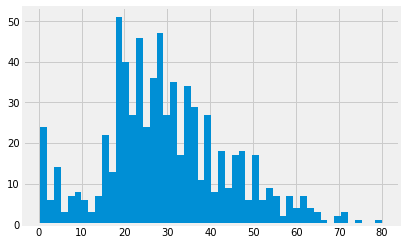

In [131]:
df.Age.hist(bins=50)

<ul>
  <li style="font-size:130%;">Here, these values(70-80) are the one which are at the end of this distribution. This histogram is of Age column as we are going to do computations on this column. So we are going to replace our Nan values with these values.</li>
</ul>

In [132]:
extreme=df.Age.mean()+3*df.Age.std()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

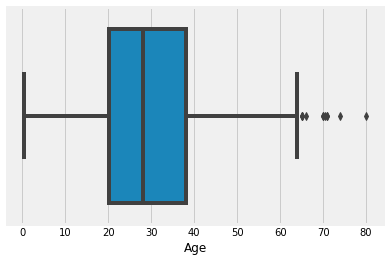

In [133]:
import seaborn as sns
sns.boxplot('Age',data=df)

<ul>
  <li style="font-size:130%;">The very first cell in the figure given above is the calculated standard deviation where we took the values which lies far end of distribution after 3rd standard deviation. </li>
</ul>

In [134]:
#Here we are creating our function with passing parameters of df(data frame), variable (in our case Age is our variable), median(Calculated median)
#extreme(our standard deviation value)

def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [135]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [136]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<p style="font-size:150%;"><b>ADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Easy to implement.</li>
  <li style="font-size:130%;">Able to capture the importance of missing values</li>
</ul>

<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">It will masks the Outliers because of the distribution.</li>
</ul>

----

## 5. Arbitrary value imputation

<ul>
  <li style="font-size:130%;">Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable with an arbitrary value. The arbitrary value should be different from the mean or median and not within the normal values of the variable.</li>
  <li style="font-size:130%;">This technique was derived from kaggle competition.</li>
  <li style="font-size:130%;">We can use arbitrary values such as 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).</li>
  <li style="font-size:130%;">This method is suitable for numerical and categorical variables.</li>
</ul>

<p style="font-size:150%;"><b>Assumptions</b></p>
<ul>
  <li style="font-size:130%;">Data is not missing at random.</li>
</ul>

In [137]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/titanic/train.csv', usecols=['Age','Fare','Survived'])

In [138]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [139]:
impute_nan(df, "Age")

In [140]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


<p style="font-size:150%;"><b>ADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Easy to implement.</li>
  <li style="font-size:130%;">It’s a fast way to obtain complete datasets.</li>
  <li style="font-size:130%;">It can be used in production, i.e during model deployment.</li>
  <li style="font-size:130%;">It captures the importance of a value being “missing”, if there is one.</li>
</ul>

<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Distortion of the original variable distribution and variance.</li>
  <li style="font-size:130%;">Distortion of the covariance with the remaining dataset variables.</li>
  <li style="font-size:130%;">If the arbitrary value is at the end of the distribution, it may mask or create outliers.</li>
  <li style="font-size:130%;">We need to be careful not to choose an arbitrary value too similar to the mean or median (or any other typical value of the variable distribution).</li>
</ul>

----

## 6. Frequent Category Imputation

<ul>
  <li style="font-size:130%;">Frequent category imputation—or mode imputation—consists of replacing all occurrences of missing values (NA) within a variable with the mode, or the most frequent value.</li>
  <li style="font-size:130%;">This method is suitable for numerical and categorical variables, but in practice, we use this technique with categorical variables.</li>
  <li style="font-size:130%;">You can use this method when data is missing completely at random, and no more than 5% of the variable contains missing data.</li>
</ul>

<p style="font-size:150%;"><b>Assumptions</b></p>
<ul>
  <li style="font-size:130%;">Data is missing at random.</li>
  <li style="font-size:130%;">The missing observations most likely look like the majority of the observations (i.e. the mode).</li>
</ul>

In [141]:
df=pd.read_csv('../input/big-mart-sales/train_v9rqX0R.csv', usecols=['Outlet_Size', 'Item_Outlet_Sales'])

In [142]:
df.head()

,Outlet_Size,Item_Outlet_Sales
0,Medium,3735.1380
1,Medium,443.4228
2,Medium,2097.2700
3,NaN,732.3800
4,High,994.7052


<AxesSubplot:>

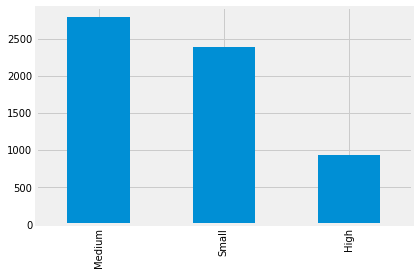

In [143]:
#Compute the frequency of each type:

df['Outlet_Size'].value_counts().plot.bar()

In [144]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [145]:
impute_nan(df,'Outlet_Size')

In [146]:
df.head()

,Outlet_Size,Item_Outlet_Sales
0,Medium,3735.1380
1,Medium,443.4228
2,Medium,2097.2700
3,Medium,732.3800
4,High,994.7052


<p style="font-size:150%;"><b>ADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">Easy to implement.</li>
  <li style="font-size:130%;">It’s a fast way to obtain complete datasets.</li>
  <li style="font-size:130%;">It can be used in production, i.e during model deployment.</li>
</ul>

<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">It distorts the relation of the most frequent label with other variables within the dataset.</li>
  <li style="font-size:130%;">May lead to an over-representation of the most frequent label if there is are a lot of missing observations.</li>
</ul>

----

## 7. REGRESSION IMPUTATION

<ul>
  <li style="font-size:130%;">Mean, median or mode imputation only look at the distribution of the values of the variable with missing entries. If we know there is a correlation between the missing value and other variables, we can often get better guesses by regressing the missing variable on other variables.</li>
</ul>

In [147]:
#Sample Dataset to implement this:

import seaborn as sns

tips = sns.load_dataset('tips')

df = tips.loc[:, ['total_bill', 'size', 'tip']]

#introduce the nan values:

df.loc[0:20, 'size'] = np.nan
df.loc[220:230, 'total_bill'] = np.nan

In [148]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,total_bill,size,tip
total_bill,1.00,0.60,0.68
size,0.60,1.00,0.49
tip,0.68,0.49,1.00


<ul>
  <li style="font-size:130%;">As we can see, in our example data, tip and total_bill have the highest correlation. Thus, we can use a simple linear model regressing total_bill on tip to fill the missing values in total_bill.</li>
</ul>

In [149]:
#create a subset of data where there are no missing values in the features

df_bill_tip = df.dropna(axis=0, subset = ['total_bill', 'tip'])
df_bill_tip = df_bill_tip.loc[:, ['total_bill', 'tip']]

#find the entries with total_bill_missing
missing_bill = df['total_bill'].isnull()

#extract the tips of observations with total_bill_missing
tip_misbill = pd.DataFrame(df['tip'][missing_bill])

In [150]:
X = df_bill_tip[['tip']]
y = df_bill_tip['total_bill']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)

bill_pred = lm.predict(tip_misbill)

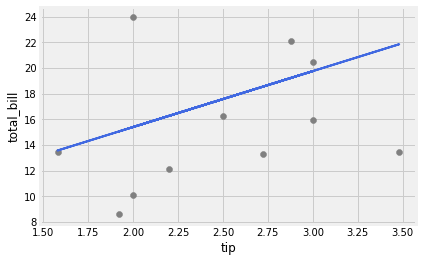

In [151]:
import matplotlib.pyplot as plt

plt.scatter(tip_misbill, tips['total_bill'][missing_bill], color='gray')
plt.plot(tip_misbill, bill_pred, color='royalblue', linewidth=2)
plt.xlabel("tip")
plt.ylabel("total_bill")
plt.show()

<ul>
  <li style="font-size:130%;">As we can see, the imputed total_bill from a simple linear model from tips does not exactly recover the truth but capture the general trend (and is better a single value imputation such as mean imputation). We can, of course, use more variables in the regression model to get better imputation.</li>
</ul>

-----

## 8. KNN IMPUTER

<ul>
  <li style="font-size:130%;">Besides model-based imputation like regression imputation, neighbour-based imputation can also be used. K-nearest neighbour (KNN) imputation is an example of neighbour-based imputation. For a discrete variable, KNN imputer uses the most frequent value among the k nearest neighbours and, for a continuous variable, use the mean or mode.</li>
  <li style="font-size:130%;">To use KNN for imputation, first, a KNN model is trained using complete data. For continuous data, commonly used distance metric include Euclidean, Mahapolnis, and Manhattan distance and, for discrete data, hamming distance is a frequent choice.</li>
</ul>

In [152]:
from sklearn.impute import KNNImputer
import numpy as np

X = [ [3, np.NaN, 5], [1, 0, 0], [3, 3, 3] ]
print("X: ", X)
print("===========")


imputer = KNNImputer(n_neighbors= 1)
impute_with_1 = imputer.fit_transform(X)

print("\nImpute with 1 Neighbour: \n", impute_with_1)



imputer = KNNImputer(n_neighbors= 2)
impute_with_2 = imputer.fit_transform(X)

print("\n Impute with 2 Neighbours: \n", impute_with_1)

X:  [[3, nan, 5], [1, 0, 0], [3, 3, 3]]

Impute with 1 Neighbour: 
 [[3. 3. 5.]
 [1. 0. 0.]
 [3. 3. 3.]]

 Impute with 2 Neighbours: 
 [[3. 3. 5.]
 [1. 0. 0.]
 [3. 3. 3.]]


----

<h1 style="color:navy;"><center><b style="font-size:160%;"><u>HANDLING OUTLIERS</u></b></center></h1>

<p style="font-size:150%;"><b>What is an Outlier?</b></p>
<ul>
  <li style="font-size:130%;">An outlier is a data point that diverges from an overall pattern in a sample.</li>
</ul>

<p style="font-size:150%;"><b>Most common causes of outliers on a data set:</b></p>
<ul>
  <li style="font-size:130%;">Data entry errors (human errors)</li>
  <li style="font-size:130%;">Measurement errors (instrument errors)</li>
  <li style="font-size:130%;">Intentional (dummy outliers made to test detection methods)</li>
  <li style="font-size:130%;">Data processing errors (data manipulation or data set unintended mutations)</li>
  <li style="font-size:130%;">Sampling errors (extracting or mixing data from wrong or various sources)</li>
  <li style="font-size:130%;">Natural (not an error, novelties in data)</li>
</ul>

<p style="font-size:150%;"><b>Most common causes of outliers on a data set:</b></p>
<ul>
  <li style="font-size:130%;">Box Plot</li>
  <li style="font-size:130%;">Scatter Plot</li>
  <li style="font-size:130%;">Z-Score</li>
  <li style="font-size:130%;">IQR Score</li>
</ul>

<p style="font-size:150%;"><b>Methods to Handle Outliers</b></p>
<ul>
  <li style="font-size:130%;">Z-Score</li>
  <li style="font-size:130%;">IQR Score</li>
</ul>

<p style="font-size:150%;"><b>Algorithms that are NOT sentitive to outliers</b></p>
<ul>
  <li style="font-size:130%;">Naive Bayes</li>
  <li style="font-size:130%;">SVM</li>
  <li style="font-size:130%;">Decision Trees</li>
  <li style="font-size:130%;">Random Forest</li>
  <li style="font-size:130%;">XGBoost, GBM</li>
  <li style="font-size:130%;">KNN</li>
</ul>

<p style="font-size:150%;"><b>Algorithms that are sentitive to outliers</b></p>
<ul>
  <li style="font-size:130%;">Linear Regression</li>
  <li style="font-size:130%;">Logistic Regression</li>
  <li style="font-size:130%;">K-Means Clustering</li>
  <li style="font-size:130%;">Hierarchical Clustering</li>
  <li style="font-size:130%;">PCA</li>
  <li style="font-size:130%;">Neural Networks</li>
</ul>

----

<h1 style="color:navy;"><center><b style="font-size:160%;"><u>HANDLING CATEGORICAL VARIABLES</u></b></center></h1>

<p style="font-size:150%;"><b>What is Categorical Encoding?</b></p>
<ul>
  <li style="font-size:130%;">Categorical encoding is a process of converting categories to numbers.</li>
</ul>

<p style="font-size:150%;"><b>Different Approaches to Categorical Encoding</b></p>
<ul>
  <li style="font-size:130%;">Ordinal Encoding</li>
  <li style="font-size:130%;">One Hot Encoding</li>
  <li style="font-size:130%;">Count Or Frequency Encoding</li>
  <li style="font-size:130%;">Target Guided Ordinal Encoding</li>
  <li style="font-size:130%;">Mean Encoding</li>
</ul>

## 1. Ordinal Encoding

In [153]:
df = pd.DataFrame({"Score": ["Low", "Low", "Medium", "Medium", "High", "Low", "Medium","High", "Low"]})
print(df)

    Score
0     Low
1     Low
2  Medium
3  Medium
4    High
5     Low
6  Medium
7    High
8     Low


In [154]:
scale_mapper = {"Low":1, "Medium":2, "High":3}
df["Scale"] = df["Score"].replace(scale_mapper)

In [155]:
print(df)

    Score  Scale
0     Low      1
1     Low      1
2  Medium      2
3  Medium      2
4    High      3
5     Low      1
6  Medium      2
7    High      3
8     Low      1


## 2. One Hot Encoding

In [156]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/titanic/train.csv', usecols=['Embarked'])

In [157]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [158]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [159]:
df.dropna(inplace=True)

In [160]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


## 3. Count Or Frequency Encoding

<ul>
  <li style="font-size:130%;">Replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the color blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency.</li>
</ul>

In [161]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/titanic/train.csv', usecols=['Sex', 'Embarked', 'Cabin', 'Survived'])

In [162]:
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin'] = df['Cabin'].str[0]

In [163]:
df.head()

,Survived,Sex,Cabin,Embarked
0,0,male,M,S
1,1,female,C,C
2,1,female,M,S
3,1,female,C,S
4,0,male,M,S


In [164]:
# create the dictionary
count_map_sex = df['Sex'].value_counts().to_dict()
count_map_cabin = df['Cabin'].value_counts().to_dict()
count_map_embark = df['Embarked'].value_counts().to_dict()
# Map the column with dictionary
df['Sex'] = df['Sex'].map(count_map_sex)
df['Cabin'] = df['Cabin'].map(count_map_cabin)
df['Embarked'] = df['Embarked'].map(count_map_embark)
df.head()

,Survived,Sex,Cabin,Embarked
0,0,577,687,644.0
1,1,314,59,168.0
2,1,314,687,644.0
3,1,314,59,644.0
4,0,577,687,644.0


<p style="font-size:150%;"><b>DISADVANTAGES</b></p>
<ul>
  <li style="font-size:130%;">If two different categories appear the same amount of times in the dataset, that is, they appear in the same number of observations, they will be replaced by the same number,hence, may lose valuable information.</li>
</ul>

## 4. Target Guided Ordinal Encoding

In [165]:
import numpy as np
import pandas as pd

df=pd.read_csv('../input/titanic/train.csv', usecols=['Cabin','Survived'])

In [166]:
df['Cabin'].fillna('Missing',inplace=True)
df['Cabin']=df['Cabin'].astype(str).str[0]

In [167]:

df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [168]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [169]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [170]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [171]:
enumerate(ordinal_labels,0)

In [172]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [173]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## 5. Mean Encoding

In [174]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [175]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


-----------

<h1 style="color:navy;"><center><b style="font-size:160%;"><u>FEATURE TRANSFORMATION</u></b></center></h1>

<p style="font-size:150%;"><b>What is Feature Transformations</b></p>
<ul>
  <li style="font-size:130%;">Feature transformation is the process of modifying your data but keeping the information. These modifications will make Machine Learning algorithms understanding easier, which will deliver better results.</li>
</ul>

<p style="font-size:150%;"><b>Types of Transformations</b></p>
<ul>
  <li style="font-size:130%;">Standard Scaler</li>
  <li style="font-size:130%;">Min Max Scaler</li>
  <li style="font-size:130%;">Robust Scaler</li>
  <li style="font-size:130%;">logarithmic Transformation</li>
  <li style="font-size:130%;">reciprocal Transformation</li>
  <li style="font-size:130%;">square root Transformation</li>
  <li style="font-size:130%;">exponential Transformation</li>
  <li style="font-size:130%;">boxcox Transformation</li>
</ul>

<p style="font-size:140%;"><b>Standard Scaler</b></p>
<ul>
  <li style="font-size:130%;">For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).</li>
  <li style="font-size:130%;">FORMULA: x_scaled = x – mean/std_dev</li>
</ul>

<p style="font-size:140%;"><b>Min-Max Scaler</b></p>
<ul>
  <li style="font-size:130%;">The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1.</li>
  <li style="font-size:130%;">FORMULA: x_scaled = (x – x_min)/(x_max – x_min)</li>
</ul>

<p style="font-size:140%;"><b>Robust Scaler</b></p>
<ul>
  <li style="font-size:130%;">Removes the median from the data & Scales the data by the InterQuartile Range(IQR)</li>
  <li style="font-size:130%;">FORMULA: IQR = Q3 – Q1</li>
</ul>

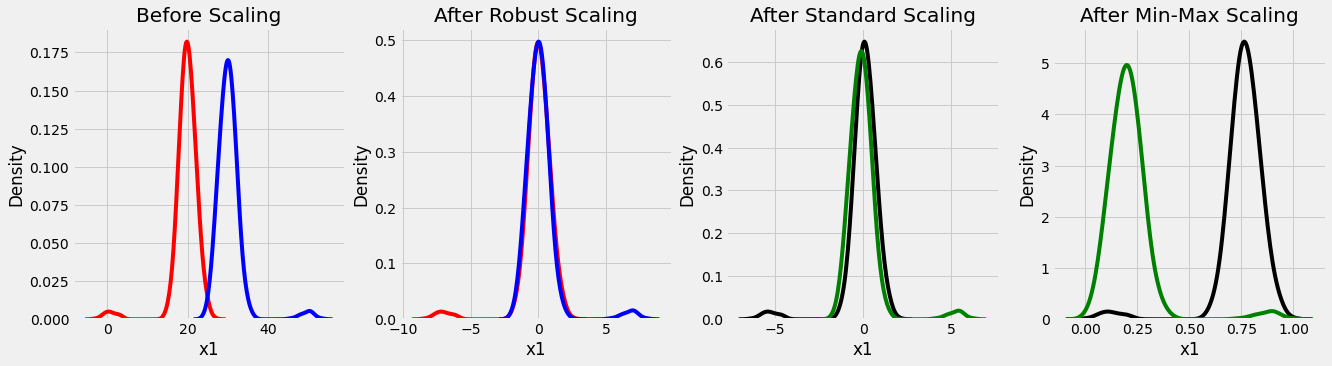

In [176]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
  
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
  
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
  
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
  
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
  
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
  
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

-------------

<h1 style="color:navy;"><center><b style="font-size:160%;"><u>FEATURE SELECTION TECHNIQUES</u></b></center></h1>

<p style="font-size:150%;"><b>What is Feature Selection</b></p>
<ul>
  <li style="font-size:130%;">Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.</li>
</ul>

<p style="font-size:150%;"><b>Feature Selection Methods:</b></p>
<ul>
  <li style="font-size:130%;">Univariate Selection</li>
  <li style="font-size:130%;">Feature Importance</li>
  <li style="font-size:130%;">Correlation Matrix with Heatmap</li>
</ul>

<p style="font-size:150%;"><b>Benefits of performing feature selection before modeling your data</b></p>
<ul>
  <li style="font-size:130%;"> Reduces Overfitting</li>
  <li style="font-size:130%;">Improves Accuracy</li>
  <li style="font-size:130%;">Reduces Training Time</li>
</ul>

<p style="font-size:140%;"><b>1. Univariate Selection</b></p>
<ul>
  <li style="font-size:130%;"> Statistical tests can be used to select those features that have the strongest relationship with the output variable.</li>
  <li style="font-size:130%;">The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.</li>
</ul>

In [177]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [178]:
data = pd.read_csv('../input/mobile-price-classification/train.csv')

In [179]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


<p style="font-size:140%;"><b>2. Feature Importance</b></p>
<ul>
  <li style="font-size:130%;">Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.</li>
  <li style="font-size:130%;">Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.</li>
</ul>

[0.05999531 0.01985315 0.03373114 0.0198091  0.03220218 0.01791912
 0.03516738 0.03349879 0.0355848  0.03308317 0.03378268 0.04702942
 0.04708364 0.39510557 0.03413178 0.03404709 0.03366993 0.0148997
 0.01898505 0.02042101]


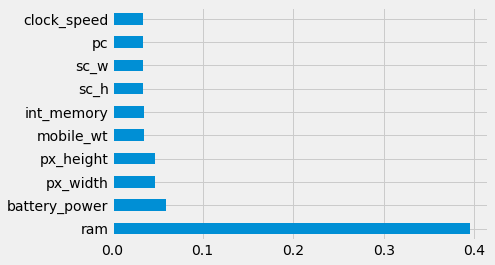

In [180]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<p style="font-size:140%;"><b>3.Correlation Matrix with Heatmap</b></p>
<ul>
  <li style="font-size:130%;">Correlation states how the features are related to each other or the target variable.</li>
  <li style="font-size:130%;">Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).</li>
  <li style="font-size:130%;">Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.</li>
</ul>


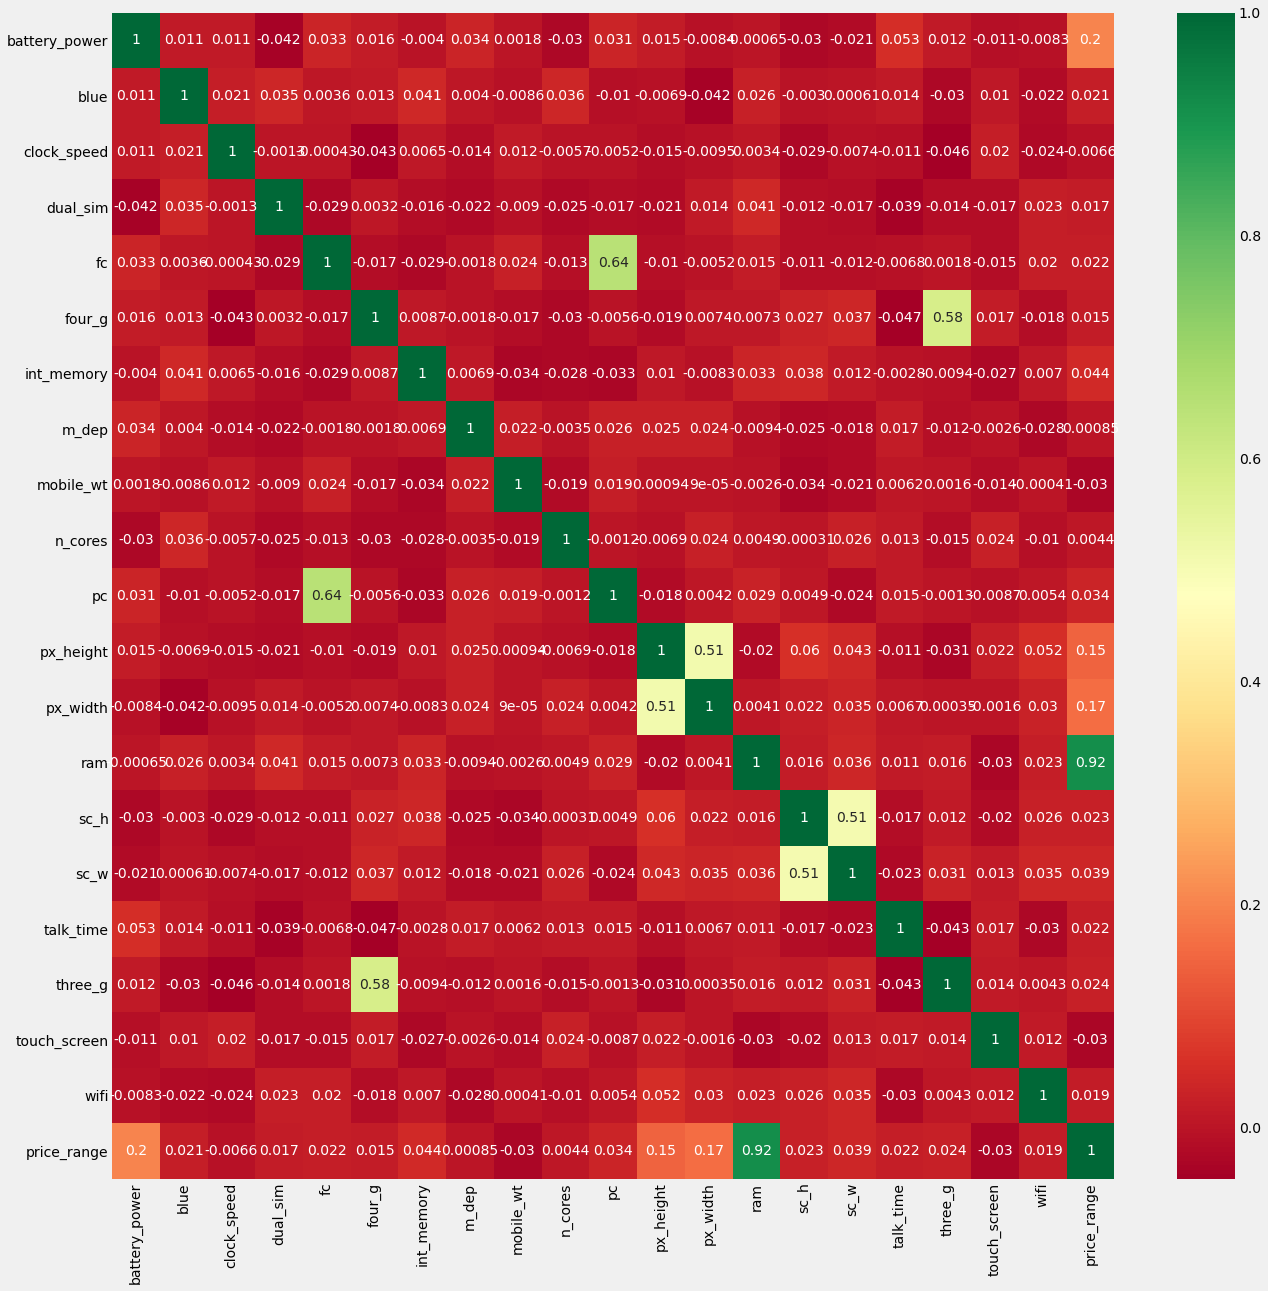

In [181]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

------------

<h1 style="color:navy;"><center><b style="font-size:160%;"><u>CONCLUSION</u></b></center></h1>

<ul>
  <li style="font-size:180%;">In this kernel, I have discussed everything about Feature Engineering steps in Machine Learning with Implementation in Python.</li>
  <li style="font-size:180%;">I have created this kernel to get all the information related to Feature Engineering at a single place. For this I have used many different sources.</li>
</ul>

## <center>If You find this kernel insightful, please give an upvote. Thank you!!</center>